In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
dummy = pd.read_csv('mileage_dummy.csv')

In [5]:
dummy.drop(columns=['Unnamed: 0'],inplace = True)

In [6]:
train = dummy.sample(frac=0.8,random_state=0)
test = dummy.drop(train.index)

In [7]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values.reshape(-1,1)

In [8]:
y_train

array([[14. ],
       [25. ],
       [13. ],
       [21. ],
       [18. ],
       [35. ],
       [34.1],
       [20. ],
       [15. ],
       [23.5],
       [40.9],
       [37.2],
       [18. ],
       [23. ],
       [15.5],
       [35.7],
       [31. ],
       [27. ],
       [18. ],
       [37.3],
       [15.5],
       [23. ],
       [24. ],
       [18. ],
       [34.5],
       [25.4],
       [36.1],
       [34. ],
       [30. ],
       [16. ],
       [18.6],
       [37. ],
       [15. ],
       [33.5],
       [22.4],
       [24. ],
       [19. ],
       [16.9],
       [31.9],
       [12. ],
       [14. ],
       [15. ],
       [27.4],
       [23.7],
       [32. ],
       [24. ],
       [22.5],
       [16.5],
       [21. ],
       [26. ],
       [41.5],
       [29. ],
       [15. ],
       [30. ],
       [15. ],
       [10. ],
       [18. ],
       [20.2],
       [36. ],
       [17. ],
       [18. ],
       [26.5],
       [18. ],
       [22. ],
       [12. ],
       [14. ],
       [15

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
y_train  = scaler_y.fit_transform(y_train)

In [10]:
X_train

array([[1.        , 0.58152174, 0.71335413, ..., 0.        , 0.        ,
        0.31513338],
       [0.2       , 0.1576087 , 0.26339665, ..., 0.        , 0.        ,
        0.17090812],
       [1.        , 0.51086957, 0.76013609, ..., 0.        , 0.        ,
        0.23010808],
       ...,
       [0.6       , 0.29347826, 0.57187411, ..., 0.        , 0.        ,
        0.13354424],
       [0.2       , 0.1576087 , 0.17947264, ..., 0.        , 0.        ,
        0.24518005],
       [0.2       , 0.17391304, 0.1947831 , ..., 0.        , 0.        ,
        0.25511919]])

In [11]:
X_train.shape[1]

39

In [12]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu',input_shape =[39]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [13]:
model = build_model()

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2560      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


In [15]:
example_batch = X_train[:10]
example_result = model.predict(np.asarray(example_batch))
example_result

array([[ 0.07121392],
       [-0.02972823],
       [ 0.06441306],
       [ 0.04895391],
       [-0.01459663],
       [ 0.1803725 ],
       [ 0.05714274],
       [-0.06459863],
       [-0.01029874],
       [-0.02387566]], dtype=float32)

In [17]:
EPOCHS = 1000

history = model.fit(
  X_train,y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0005,  mae:0.0163,  mse:0.0005,  val_loss:0.0052,  val_mae:0.0545,  val_mse:0.0052,  
....................................................................................................
Epoch: 100, loss:0.0003,  mae:0.0099,  mse:0.0003,  val_loss:0.0063,  val_mae:0.0602,  val_mse:0.0063,  
....................................................................................................
Epoch: 200, loss:0.0004,  mae:0.0140,  mse:0.0004,  val_loss:0.0052,  val_mae:0.0535,  val_mse:0.0052,  
....................................................................................................
Epoch: 300, loss:0.0003,  mae:0.0116,  mse:0.0003,  val_loss:0.0055,  val_mae:0.0565,  val_mse:0.0055,  
....................................................................................................
Epoch: 400, loss:0.0001,  mae:0.0073,  mse:0.0001,  val_loss:0.0055,  val_mae:0.0583,  val_mse:0.0055,  
........................................................................

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.000101,0.006414,0.000101,0.004844,0.052044,0.004844,995
996,0.000113,0.006977,0.000113,0.004596,0.051025,0.004596,996
997,0.000207,0.010182,0.000207,0.005102,0.054586,0.005102,997
998,0.000170,0.009001,0.000170,0.004721,0.051764,0.004721,998
999,0.000221,0.009354,0.000221,0.004749,0.052331,0.004749,999


In [23]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

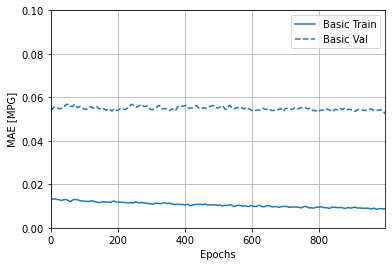

In [54]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.1])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

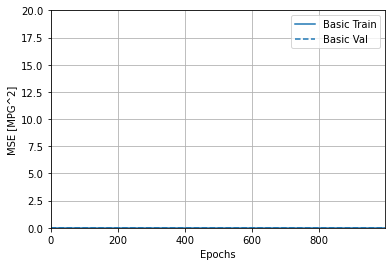

In [25]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [44]:
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [20]:
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)

In [38]:
test_predictions = model.predict(X_test)

In [39]:
test_predictions = scaler_y.inverse_transform(test_predictions)

In [40]:
test_predictions = test_predictions.flatten()

In [41]:
test_predictions

array([12.386303 , 14.110046 , 13.561791 , 24.941872 , 19.052944 ,
       12.615643 , 13.246279 , 12.15886  , 15.010701 , 20.9889   ,
       22.872707 , 15.3003235, 15.632257 , 22.973085 , 22.858892 ,
       14.707464 , 14.812741 , 12.571374 , 17.91172  , 13.423458 ,
       14.223309 , 30.93275  , 21.461948 , 14.25572  , 18.107475 ,
       17.815666 , 22.797749 , 29.65127  , 30.391628 , 16.846134 ,
       20.268187 , 23.508825 , 18.626083 , 20.36801  , 22.255169 ,
       26.39924  , 27.65177  , 18.42674  , 16.120441 , 24.862566 ,
       30.437672 , 20.971916 , 29.152954 , 20.209074 , 31.251078 ,
       15.037365 , 28.140451 , 16.810974 , 20.720306 , 19.65866  ,
       17.306152 , 26.857103 , 27.458033 , 23.34293  , 18.037207 ,
       18.318844 , 16.741196 , 19.238739 , 16.827229 , 22.215342 ,
       32.664745 , 22.419771 , 14.195612 , 31.326998 , 34.021103 ,
       28.587727 , 37.637905 , 39.394466 , 34.067383 , 34.28173  ,
       35.17126  , 27.500002 , 26.767841 , 23.803982 , 21.3142

In [43]:
y_test

array([[ 0.13661202],
       [ 0.        ],
       [-0.0273224 ],
       [ 0.40983607],
       [ 0.40983607],
       [ 0.10928962],
       [ 0.10928962],
       [ 0.05464481],
       [ 0.24590164],
       [ 0.57377049],
       [ 0.38251366],
       [ 0.08196721],
       [ 0.13661202],
       [ 0.35519126],
       [ 0.46448087],
       [ 0.08196721],
       [ 0.10928962],
       [ 0.08196721],
       [ 0.21857923],
       [ 0.08196721],
       [ 0.13661202],
       [ 0.51912568],
       [ 0.27322404],
       [ 0.13661202],
       [ 0.24590164],
       [ 0.13661202],
       [ 0.6010929 ],
       [ 0.38251366],
       [ 0.57377049],
       [ 0.21857923],
       [ 0.27322404],
       [ 0.40983607],
       [ 0.21857923],
       [ 0.35519126],
       [ 0.40983607],
       [ 0.40983607],
       [ 0.43715847],
       [ 0.32786885],
       [ 0.38251366],
       [ 0.51912568],
       [ 0.51912568],
       [ 0.20491803],
       [ 0.53278689],
       [ 0.17759563],
       [ 0.31420765],
       [ 0

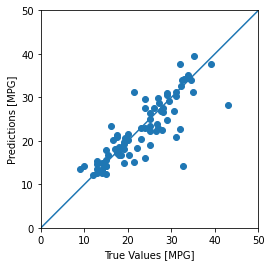

In [45]:

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

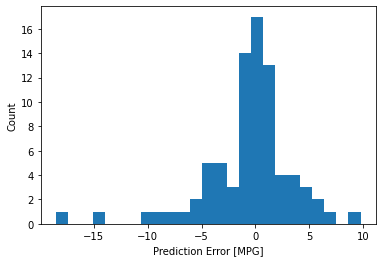

In [46]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")